## EJERCICIO 1 - BASICO

El fichero datos_pago_microcreditos.csv contiene 30000 transacciones bancarias relativas al pago o impago de microcreditos. El dataset consta de 62 dimensiones propietarias de las cuales el banco no ha proporcionado informacion por confidencialidad, a parte de su valor. La matriz de entrada se encuentra en x_train, e y_train contiene la etiqueta relativa a esa transaccion, un 1 indica que si se pago el microcredito y un 0 que no se pago.

Considera que el tamaño del dataset es lo suficientemente grande como para, dependiendo de los recursos de la maquina, poder tardar varios minutos en entrenar modelos complejos. 

Ejecuta el codigo inicial para estandarizar los dartos y contesta las preguntas.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier #Knn and tree (Preguntas 1-2)
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV #(Pregunta 3)

from sklearn.neural_network import MLPClassifier #(Pregunta 5)

from sklearn.ensemble import GradientBoostingClassifier #(Pregunta 6)

import matplotlib.pyplot as plt

In [2]:
data_file='data/datos_pago_microcreditos.csv'

pdl=pd.read_csv(data_file)

In [3]:
print(pdl.head())

   payment var1 var2  var3   var4   var5   var6   var7  var8 var9  ...  var21  \
0  Success   qw   hk  3.11  16.06  -4.60  22.34  13.53  1.53   nv  ...   8.94   
1   Denied   qw   rv  3.35  11.18 -18.55   6.68  12.78  6.62   nv  ...  31.02   
2   Denied   qw   zg  4.15  29.19  18.91  16.40   3.67  5.72   ch  ...  23.26   
3  Success   wv   js  6.23  15.70   2.81   4.46   5.13  8.66   ja  ...  29.25   
4  Success   ma   xn  1.28  20.71  14.98  11.19  17.66  1.13   nv  ...   2.19   

   var22  var23  var24  var25  var26  var27 var28  var29  var30  
0 -12.76     ub  12.06   2.46   4.73  -1.72  0.91     ev   8.00  
1  34.76     cz   1.44   9.44  13.56  -2.24  0.24     ev  -2.90  
2   9.50     ri   7.77   8.70  -1.75   5.96  1.91     ev  22.67  
3  -1.53     ri   8.94  19.33  23.73   5.54  0.85     ev  36.31  
4  10.24     ub   8.92   5.48  -0.28   4.01  1.21     ev  11.33  

[5 rows x 31 columns]


In [4]:
print(pdl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   payment  30000 non-null  object 
 1   var1     30000 non-null  object 
 2   var2     30000 non-null  object 
 3   var3     30000 non-null  float64
 4   var4     30000 non-null  float64
 5   var5     30000 non-null  float64
 6   var6     30000 non-null  float64
 7   var7     30000 non-null  float64
 8   var8     30000 non-null  float64
 9   var9     30000 non-null  object 
 10  var10    30000 non-null  object 
 11  var11    30000 non-null  object 
 12  var12    30000 non-null  float64
 13  var13    30000 non-null  object 
 14  var14    30000 non-null  float64
 15  var15    30000 non-null  float64
 16  var16    30000 non-null  float64
 17  var17    30000 non-null  object 
 18  var18    30000 non-null  float64
 19  var19    30000 non-null  object 
 20  var20    30000 non-null  float64
 21  var21    300

In [5]:
print(pdl.describe())

               var3          var4          var5          var6          var7  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       3.018848     13.941943     19.981561      8.009453      9.110358   
std        3.004458     14.028019     19.866781      8.013395      8.976009   
min       -8.190000    -43.660000    -55.100000    -23.630000    -27.580000   
25%        0.990000      4.450000      6.520000      2.550000      3.050000   
50%        3.040000     13.920000     19.980000      8.010000      9.170000   
75%        5.040000     23.520000     33.452500     13.430000     15.152500   
max       15.160000     76.780000    107.080000     44.330000     48.390000   

               var8         var12         var14         var15         var16  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       5.993785      7.020662      2.007760     17.118747     10.919426   
std        6.035204      7.004504      2.001967    

In [6]:
pdl["payment"]=np.where(pdl["payment"]=="Success",1,0)

k=pdl.columns

for col in k:
    if pdl[col].dtype=='object':
        temp=pd.get_dummies(pdl[col],drop_first=True,prefix=col)
        pdl=pd.concat([pdl,temp],axis=1)
        pdl.drop([col],axis=1,inplace=True)


pdl.dropna(axis=0,inplace=True)

## Distribucion de Clases

Y es que antes de empezar a utilizar los datos, me gustaria saber como estos tendrán un impactó el entrenamiento de los modelos que utilicemos en este notebook.

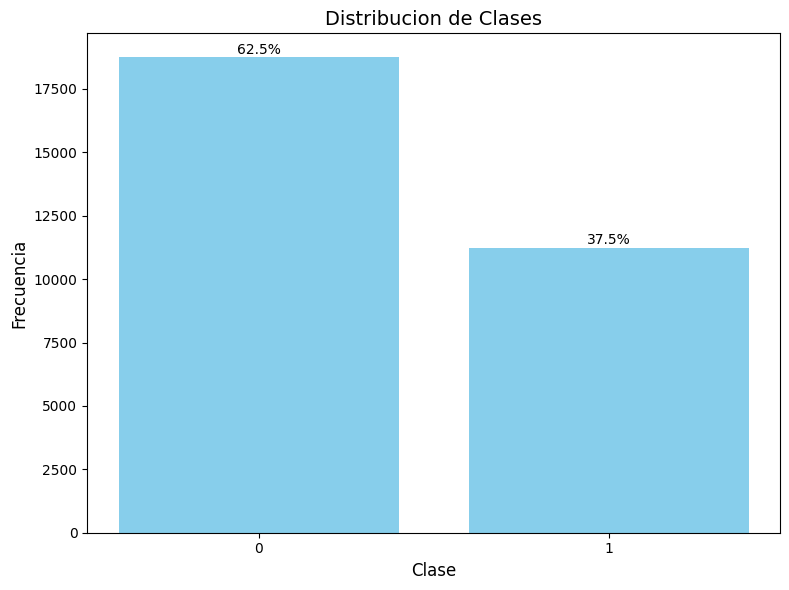

In [7]:
class_counts = pdl['payment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index.astype(str), class_counts.values, color='skyblue')

percentages = (class_counts / len(pdl)) * 100
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 5, f'{percentages[i]:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title('Distribucion de Clases', fontsize=14)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

In [8]:
pdl_train, pdl_test = train_test_split(pdl, test_size = 0.2,random_state=2)

#x_train=pdl_train.drop(["payment"],1)
x_train=pdl_train.drop(columns="payment")
y_train=pdl_train["payment"]

#x_test=pdl_test.drop(["payment"],1)
x_test=pdl_test.drop(columns="payment")
y_test=pdl_test["payment"]

x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [9]:
y_train

0        0
1        1
2        0
3        0
4        1
        ..
23995    0
23996    1
23997    0
23998    0
23999    1
Name: payment, Length: 24000, dtype: int64

In [10]:
x_train

,var3,var4,var5,var6,var7,var8,var12,var14,var15,var16,...,var23_da,var23_fe,var23_po,var23_qu,var23_ri,var23_sy,var23_tf,var23_ub,var23_yv,var29_ev
0,1.02,22.08,8.69,-9.24,21.06,2.21,1.33,2.00,7.62,-5.77,...,False,True,False,False,False,False,False,False,False,False
1,2.09,11.25,23.46,12.11,29.57,4.77,8.86,2.38,29.48,28.14,...,False,False,False,False,False,False,True,False,False,False
2,6.77,25.95,3.95,17.74,19.78,9.02,3.76,0.72,34.00,17.19,...,False,False,False,False,False,False,False,True,False,True
3,2.75,12.47,-4.54,-1.42,-10.32,9.11,8.37,7.91,4.86,3.67,...,False,False,False,False,False,False,False,True,False,True
4,4.47,7.90,31.60,2.53,-12.66,3.64,1.87,5.07,19.04,28.70,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,-1.28,9.09,11.89,5.58,17.29,15.65,8.28,0.77,23.06,9.79,...,False,False,False,False,False,False,False,True,False,True
23996,1.60,9.52,14.64,6.11,20.14,17.93,0.50,1.19,1.14,8.22,...,False,False,False,False,False,False,True,False,False,True
23997,0.54,22.37,42.39,12.41,3.54,5.09,0.22,1.45,24.50,4.45,...,False,True,False,False,False,False,False,False,False,True
23998,3.37,11.72,17.49,-2.63,0.83,12.47,17.58,0.32,3.22,11.61,...,False,False,False,False,False,True,False,False,False,True


## Metricas

Se usaran la mayoria de las siguientes metricas en los proximos ejercicios

In [68]:
def confusion_matrices(y_test, y_pred_knn, y_pred_tree, title="Matriz de Confusion"):
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    cm_tree = confusion_matrix(y_test, y_pred_tree)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["No pago", "Pago"]).plot(cmap=plt.cm.Blues, ax=axes[0])
    ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=["No pago", "Pago"]).plot(cmap=plt.cm.Reds, ax=axes[1])

    axes[0].set_title("K-NN (k=3)")
    axes[1].set_title("Arbol de Decision")

    fig.suptitle(title, fontsize=16)
    
    plt.tight_layout()
    plt.show()

In [12]:
def comparison_metrics(y_test, y_pred_knn, y_pred_tree):
    metrics = {
        "Accuracy": [
            accuracy_score(y_test, y_pred_knn),
            accuracy_score(y_test, y_pred_tree)
        ],
        "Precision": [
            precision_score(y_test, y_pred_knn),
            precision_score(y_test, y_pred_tree)
        ],
        "Recall": [
            recall_score(y_test, y_pred_knn),
            recall_score(y_test, y_pred_tree)
        ],
        "F1-Score": [
            f1_score(y_test, y_pred_knn),
            f1_score(y_test, y_pred_tree)
        ]
    }

    metrics_df = pd.DataFrame(metrics, index=["K-NN", "Decision Tree"])

    metrics_df.plot(kind="bar", figsize=(12,6), colormap="Pastel1", edgecolor='black')
    plt.title("Comparacion de Metricas entre Modelos")
    plt.ylabel("Valor")
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.legend(loc="upper right")
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

In [13]:
def plot_confusion_matrix(y_test, y_pred, title="Matriz de Confusion", cmap=plt.cm.Oranges):
    labels = ["No pago", "Pago"]
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=cmap)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [14]:
def feature_importances(tree, x_train):
    importances = tree.feature_importances_
    features = x_train.columns
    feat_imp_df = pd.DataFrame({'feature': features, 'importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False) 

    print(feat_imp_df.head(10))

    feat_imp_df.head(10).plot(kind='barh', x='feature', y='importance', legend=False, figsize=(8,5))
    plt.title("Caracteristicas mas importantes (Arbol de Decision)")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Pregunta 1:
Construye un  clasificador usando K-NN con 3 vecinos y otro usando un arbol de decision. ¿cual produce mejor resultado? ¿que metrica has usado? segun el arbol de decision, ¿que metricas son las mas relevantes?


Se utiliza el clasificador K-NN ```(KNeighborsClassifier)``` con ```n_neighbors=3.```

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred_knn = knn.predict(x_test)
f1_Sc_knn = f1_score(y_test, y_pred_knn)

y_pred_tree = tree.predict(x_test)
f1_Sc_tree = f1_score(y_test, y_pred_tree)

## Evaluacion y Metricas
**Metrica Principal:**
Se usará el f1-Score como metrica principal, ya que ambas clases son importantes y no queremos que el modelo se enfoque solo en una.

**Métricas Complementarias:**
Además, se utilizará la matriz de confusion, así como las metricas de precisióo, recall y accuracy, con el fin de verificar que tanto afecta a los modelos el pequeño desbalance de clases que existen.
Estas metricas ofrecen mayor detalle sobre el desempeño del modelo en cada clase, lo cual nos puede brindar una mejor vision del problema, gracias a esto podremos identificar si existen falsos negativos y falsos positivos.

In [19]:
print("Reporte K-NN:")
print(classification_report(y_test, y_pred_knn))
print("\nReporte Arbol de Decision:")
print(classification_report(y_test, y_pred_tree))

print(f"f1-Score K-NN: {f1_Sc_knn*100}")
print(f"f1-Score Árbol de Decisión: {f1_Sc_tree*100:.4f}")

Reporte K-NN:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      3762
           1       0.56      0.49      0.52      2238

    accuracy                           0.67      6000
   macro avg       0.64      0.63      0.63      6000
weighted avg       0.66      0.67      0.66      6000


Reporte Arbol de Decision:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      3762
           1       0.70      0.71      0.71      2238

    accuracy                           0.78      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.78      0.78      0.78      6000

f1-Score K-NN: 52.00573065902579
f1-Score Árbol de Decisión: 70.8000


**Observación sobre K-NN:**
Dado que K-NN es sensible a la escala, al no normalizar los datos, es posible que su desempeño no sea el optimo si las variables tienen diferentes rangos. En la pregunta 2 vamos a probar normalizando los datos para ver si el algoritmo mejora.

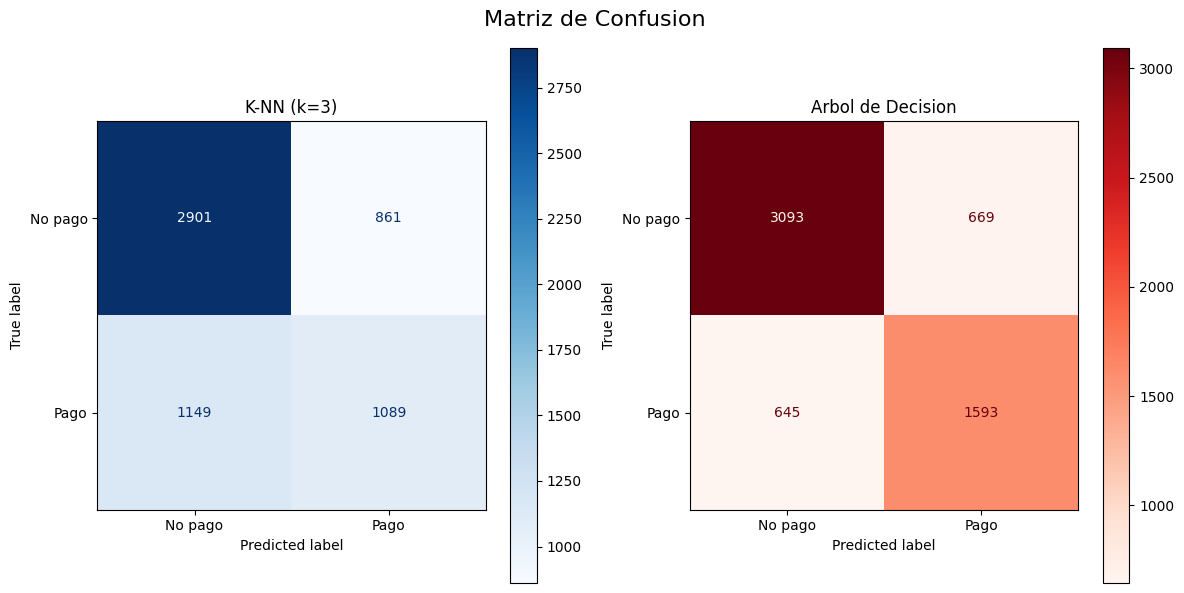

In [69]:
confusion_matrices(y_test, y_pred_knn, y_pred_tree)

     feature  importance
15     var25    0.361581
42  var17_bw    0.089833
9      var16    0.077846
4       var7    0.050887
59  var23_ub    0.046942
3       var6    0.021038
14     var24    0.020179
16     var26    0.020167
10     var18    0.019546
0       var3    0.019358


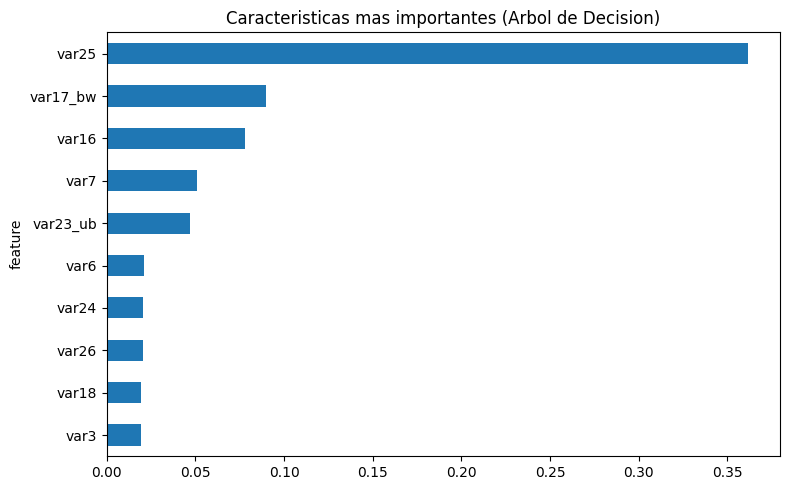

In [21]:
feature_importances(tree, x_train)

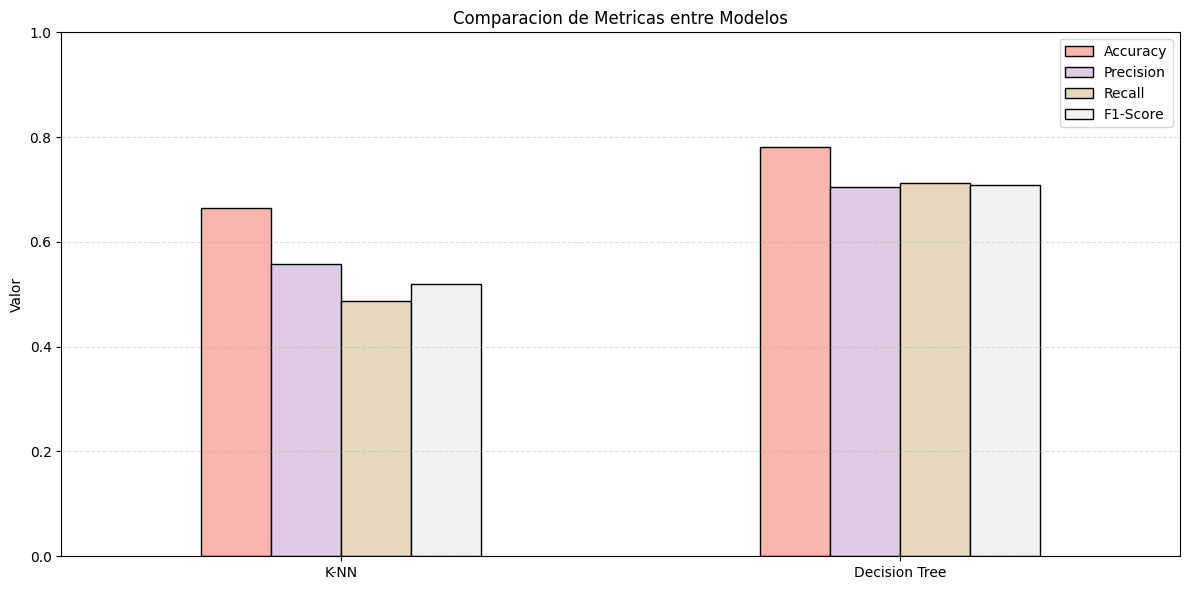

In [22]:
comparison_metrics(y_test, y_pred_knn, y_pred_tree)

**¿Cuál produce mejor resultado?**

Tras entrenar y evaluar ambos modelos en el conjunto de prueba, se hace la comparativa de las métricas.

Debido a que el Arbol de Decision presenta un mayor F1-score, podemos concluir que, al trabajar con datos sin normalizar, este modelo se beneficia de su capacidad de dividir el espacio de manera no lineal y de ser insensible a la escala. Ademas de esto, y basandonos en la comparacion de metricas entre modelos, podemos observar que el Arbol de Decisión supera al K-NN en todas las metricas evaluadas (Accuracy, Precision, Recall y F1-Score), presentando valores mas equilibrados y consistentes, mientras que el modelo K-NN muestra metricas con mayor variabilidad y un pobre desempeño.

El Arbol de Decisión es el modelo que mejor desempeño global muestra, destacándose especialmente en el F1-score, que fue nuestra métrica principal.

**¿Qué métrica has usado?**

Se ha utilizado el F1-score como metrica principal, ya que ambas clases son importantes y se busca un equilibrio entre precision y recall. Esta metrica nos permite evaluar el modelo de forma mas robusta en escenarios con cierto desbalance de clases(como es el caso en este ejercicio). Además, se han considerado metricas complementarias como la matriz de confusión, precision, recall y accuracy para un analisis mas detallado del desempeño de los modelos, tal como se explicó anteriormente.

**Segun el arbol de decision, ¿que metricas son las mas relevantes?**

Como se pudo evidenciar en una de las graficas anteriores las caracteristicas mas importantes fueron:

var25 con una importancia de:  0.359539

var17_bw con una importancia de:  0.089330

var16 con una importancia de:   0.078087

Estas variables tienen la mayor contribucion a la predicción del modelo, especialmente var25, que domina claramente en importancia.

## Conclusion

**Mejor modelo**: 

En este caso, el Árbol de Decisión fue el modelo que presentó un mejor desempeño general, destacándose por un F1-score mas alto y estable entre clases, lo que lo convierte en la mejor opcion para este problema.

# Pregunta 2:
Repite el ejercicio anterior usando normalizacion de los datos y compara los resultados.

Normalizamos los datos, debido a que los algoritmos basados en distancias se benefician mucho de esto (K-NN), usaremos dos metodos para normalizar los datos y sacar mejores conclusiones. Usaremos StandardScaler y MinMaxScaler, ya que este ultimo fue el utilizado en los ejercicios en clase y asi nos pueda brindar una mejor perspectiva del comportamiento de ambos algoritmos.

In [23]:
scaler = StandardScaler()

x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [24]:
knn_norm = KNeighborsClassifier(n_neighbors=3)
knn_norm.fit(x_train_norm, y_train)

tree_norm = DecisionTreeClassifier()
tree_norm.fit(x_train_norm, y_train)

DecisionTreeClassifier()

In [25]:
y_pred_knn_norm = knn_norm.predict(x_test_norm)
f1_Sc_knn_norm = f1_score(y_test, y_pred_knn_norm)

y_pred_tree_norm = tree_norm.predict(x_test_norm)
f1_Sc_tree_norm = f1_score(y_test, y_pred_tree_norm)

In [26]:
print("Reporte K-NN (Normalizado):")
print(classification_report(y_test, y_pred_knn_norm))
print("\nReporte Arbol de Decision (Normalizado):")
print(classification_report(y_test, y_pred_tree_norm))

print(f"f1-Score K-NN (Normalizado): {f1_Sc_knn_norm*100}")
print(f"f1-Score Arbol de Decision (Normalizado): {f1_Sc_tree_norm*100}",)

Reporte K-NN (Normalizado):
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      3762
           1       0.55      0.48      0.51      2238

    accuracy                           0.66      6000
   macro avg       0.63      0.62      0.63      6000
weighted avg       0.65      0.66      0.65      6000


Reporte Arbol de Decision (Normalizado):
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      3762
           1       0.70      0.72      0.71      2238

    accuracy                           0.78      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.78      0.78      0.78      6000

f1-Score K-NN (Normalizado): 51.18619698058951
f1-Score Arbol de Decision (Normalizado): 70.99911582670202


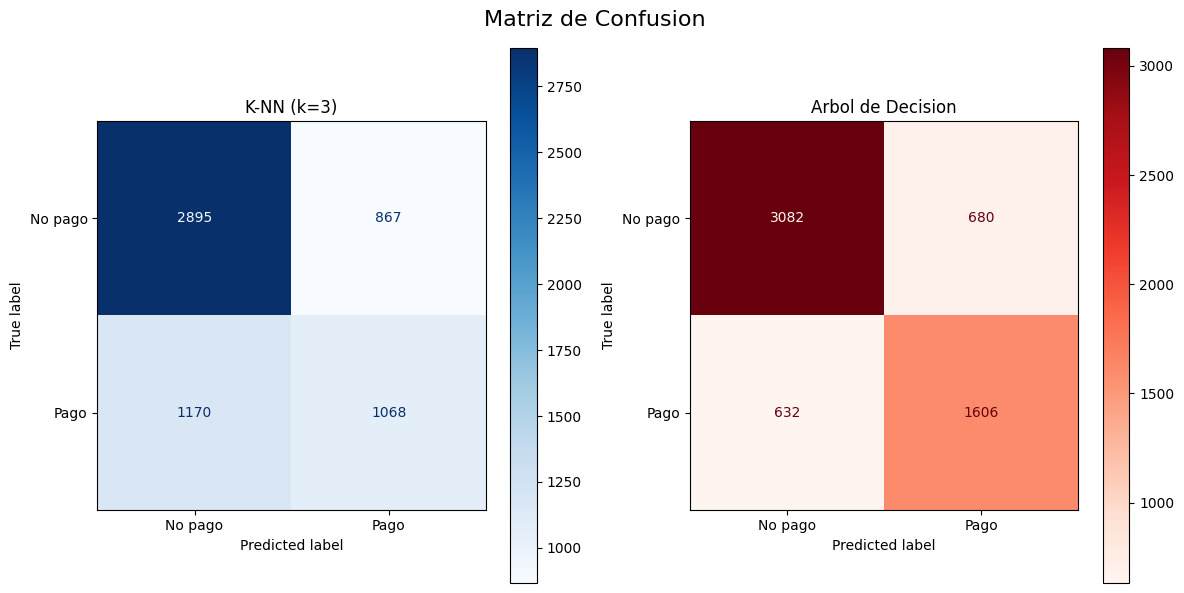

In [70]:
confusion_matrices(y_test, y_pred_knn_norm, y_pred_tree_norm)

     feature  importance
15     var25    0.360330
42  var17_bw    0.089425
9      var16    0.075959
4       var7    0.050088
59  var23_ub    0.047372
13     var22    0.021839
3       var6    0.020162
16     var26    0.020088
14     var24    0.019686
17     var27    0.019245


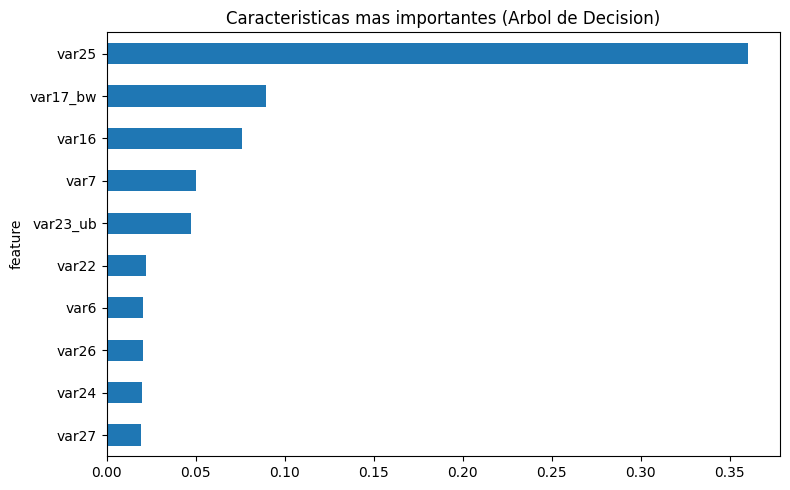

In [28]:
feature_importances(tree_norm, pd.DataFrame(x_train_norm, columns=x_train.columns))

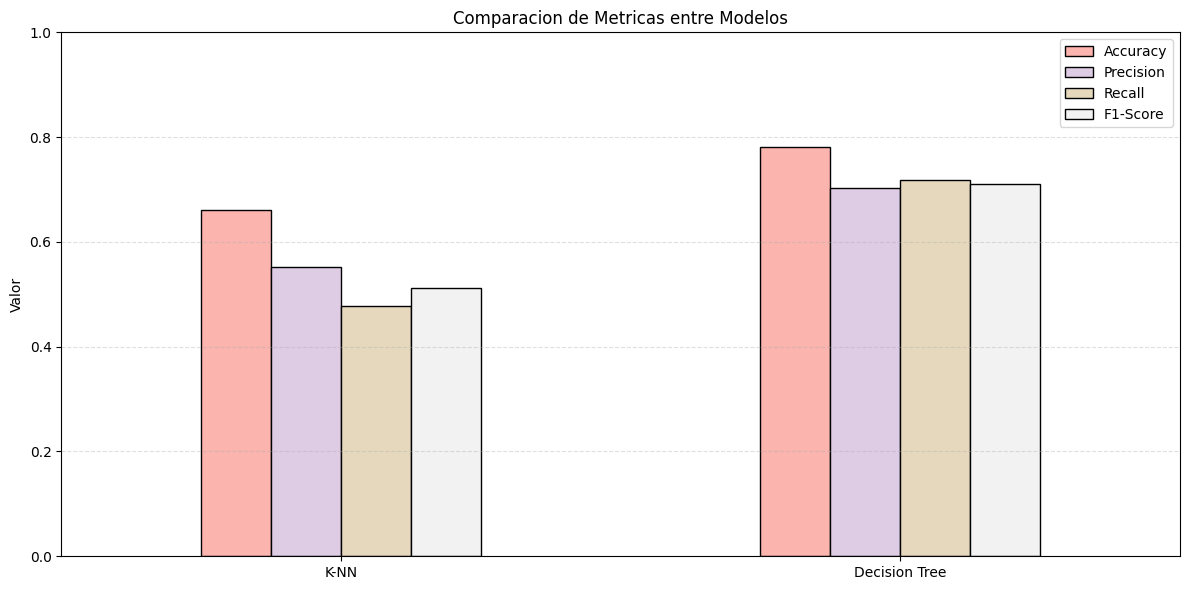

In [29]:
comparison_metrics(y_test, y_pred_knn_norm, y_pred_tree_norm)

Al no haber mejoria (especialmente en K-NN) utilizaremos otro metodo para normalizar los datos

In [30]:
scaler_mm = MinMaxScaler()
x_train_mm = scaler_mm.fit_transform(x_train)
x_test_mm = scaler_mm.transform(x_test)

In [31]:
knn_mm = KNeighborsClassifier(n_neighbors=3)
knn_mm.fit(x_train_mm, y_train)

tree_mm = DecisionTreeClassifier()
tree_mm.fit(x_train_mm, y_train)

DecisionTreeClassifier()

In [32]:
y_pred_knn_mm = knn_mm.predict(x_test_mm)
f1_Sc_knn_mm = f1_score(y_test, y_pred_knn_mm)

y_pred_tree_mm = tree_mm.predict(x_test_mm)
f1_Sc_tree_mm = f1_score(y_test, y_pred_tree_mm)

In [34]:
print("Reporte K-NN (Normalizado):")
print(classification_report(y_test, y_pred_knn_mm))
print("\nReporte Arbol de Decision (Normalizado):")
print(classification_report(y_test, y_pred_tree_mm))

print("K-NN f1-Score (MinMaxScaler):", f1_Sc_knn_mm*100)
print("Decision Tree f1-Score (MinMaxScaler):", f1_Sc_tree_mm*100)

Reporte K-NN (Normalizado):
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      3762
           1       0.48      0.44      0.46      2238

    accuracy                           0.62      6000
   macro avg       0.58      0.58      0.58      6000
weighted avg       0.61      0.62      0.61      6000


Reporte Arbol de Decision (Normalizado):
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3762
           1       0.70      0.73      0.71      2238

    accuracy                           0.78      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.78      0.78      0.78      6000

K-NN f1-Score (MinMaxScaler): 46.09613130128957
Decision Tree f1-Score (MinMaxScaler): 71.31308717500546


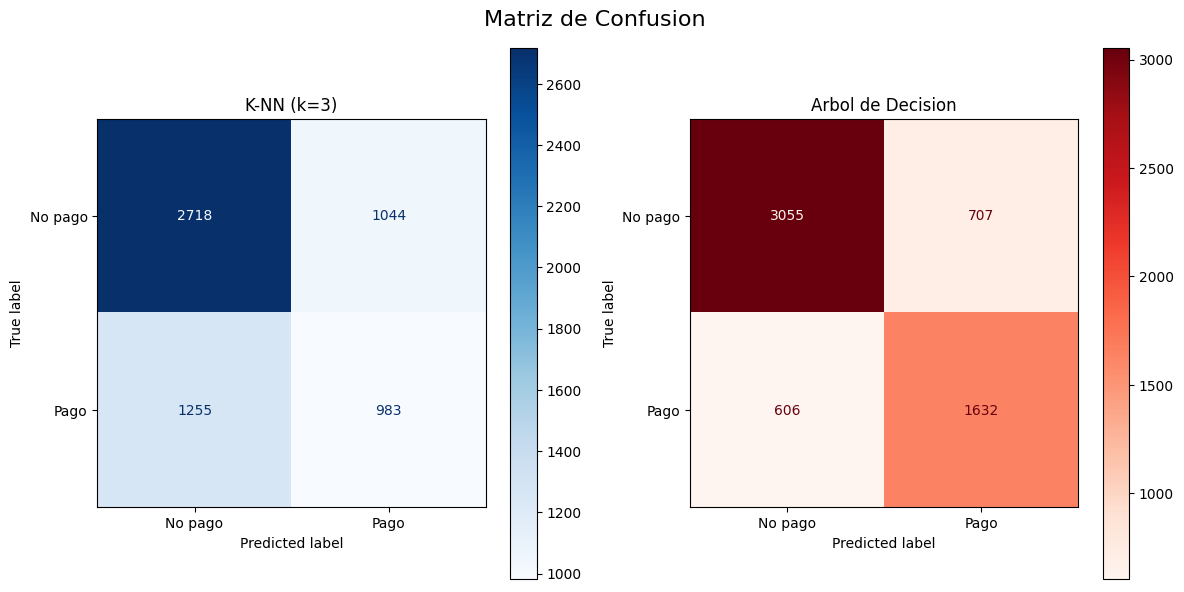

In [71]:
confusion_matrices(y_test, y_pred_knn_mm, y_pred_tree_mm)

     feature  importance
15     var25    0.360903
42  var17_bw    0.089419
9      var16    0.078324
4       var7    0.051759
59  var23_ub    0.047476
3       var6    0.021296
10     var18    0.020359
14     var24    0.019835
0       var3    0.019290
13     var22    0.019167


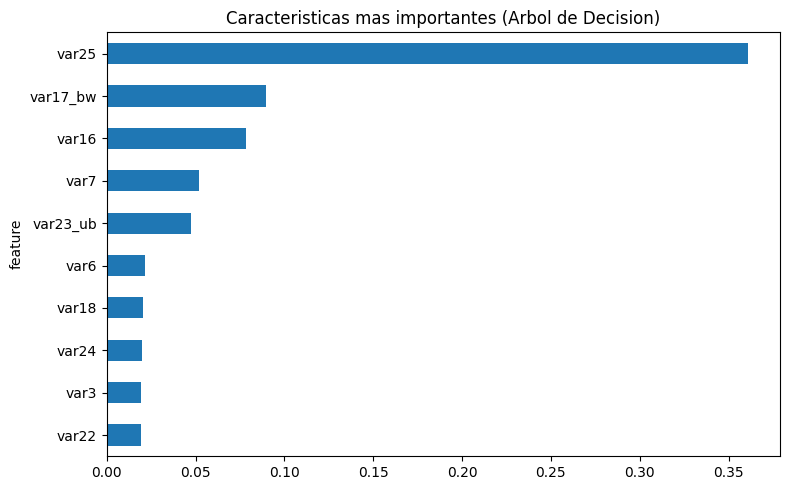

In [32]:
feature_importances(tree_mm, pd.DataFrame(x_train_mm, columns=x_train.columns))

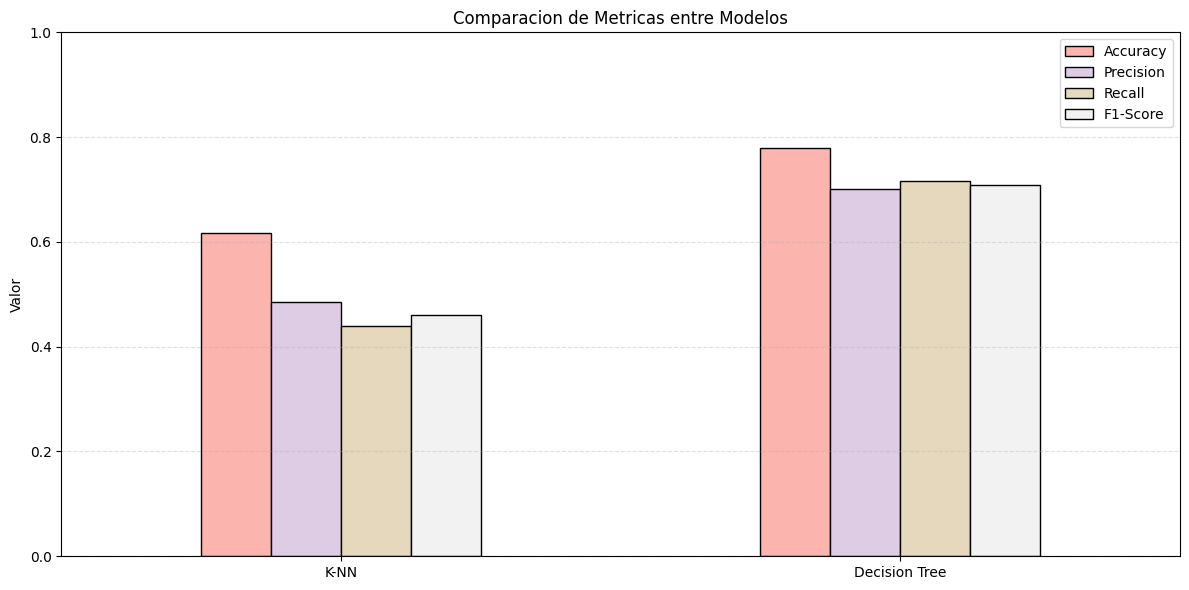

In [33]:
comparison_metrics(y_test, y_pred_knn_mm, y_pred_tree_mm)

### Comparativa General entre K-NN vs Árboles de Decisión 

| Modelo             | Normalización    | F1-Score (%) | Mejores Métricas |
|--------------------|------------------|--------------|------------------|
| K-NN               | Sin normalizar   | 52.01        | Ninguna          |
| Árbol de Decisión  | Sin normalizar   | 70.80        | Todas            |
| K-NN               | StandardScaler   | 51.19        | Ninguna          |
| Árbol de Decisión  | StandardScaler   | 71.00        | Todas            |
| K-NN               | MinMaxScaler     | 46.10        | Ninguna          |
| Árbol de Decisión  | MinMaxScaler     | 71.31        | Todas            |


## K-NN

- **Desempeño inconsistente:** Aunque K-NN es un algoritmo que se beneficia del escalado de caracteristicas, en este caso, ni el uso de StandardScaler ni de MinMaxScaler logro mejorar sustancialmente su rendimiento en terminos de F1-Score.

- **Peor rendimiento con MinMaxScaler:** El modelo alcanza su F1-Score más bajo con MinMaxScaler (46.1%), lo que indica que este tipo de normalizacion no fue la acertada en este ejercicio.

- **Métricas más bajas y dispersas:** Las metricas de precisión, recall y F1-Score, especialmente en la clase minoritaria (1 = "pago"), son considerablemente más bajas y variables, lo que refleja un desempeño inestable frente a los diferentes metodos de normalización.

## Arbol de Decision

- **Rendimiento robusto y estable:** No importa si los datos están normalizados o no, el rendimiento del árbol de decisión se mantiene constante logrando F1-Scores en torno al 71% en todos los casos.

- **Superioridad frente a K-NN:** Supera ampliamente a K-NN en F1-Score, mostrando una mayor capacidad para capturar correctamente ambas clases, incluso en contextos desbalanceados.

- **Metricas equilibradas:** Las métricas de precisión, recall y F1-Score se mantienen altas y bien distribuidas entre las clases, lo que indica una buena generalizacion del modelo sin importar el escalado de los datos.

- **Insensible a la escala**: Como se explico en clase y se observo en este experimento, el árbol de decisión no se ve afectado negativamente por la normalizacion de los datos, lo que refuerza su utilidad cuando no se tiene un preprocesamiento.

El **Arbol de Decision** es superior en este problema:

- Presenta mejores resultados en F1-Score, nuestra métrica principal, en todos los escenarios evaluados.

- Es menos sensible a la escala de los datos, lo cual lo hace más robusto ante distintos tipos de normalización.

- K-NN no muestra mejoras consistentes tras la normalización y su rendimiento, medido por F1-Score, es significativamente mas bajo.

# Pregunta 3:
Usando GridSearchCV, identifica para un clasificador K-NN el numero de vecinos entre 1 y 30 que optimiza el resultado usando como scoring la precision y con 10 folds para la validacion cruzada. 

In [35]:
param_grid = {"n_neighbors": range(1, 31)} #usamos el rango que nos dice el problema [1,30]

In [43]:
knn_grid = KNeighborsClassifier()

grid_search = GridSearchCV(knn_grid, param_grid, scoring='precision', cv=10) #usamos como scoring la precision como dice el ejercicio
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='precision')

In [44]:
print(f"Mejores parametros: {grid_search.best_params_}")
print("Mejor numero de vecinos:", grid_search.best_params_["n_neighbors"])
print("Mejor puntuación de Precision:", grid_search.best_score_)

Mejores parametros: {'n_neighbors': 30}
Mejor numero de vecinos: 30
Mejor puntuación de Precision: 0.7500582858438695


    param_n_neighbors  mean_test_score  std_test_score
0                   1         0.507101        0.012435
1                   2         0.608855        0.030492
2                   3         0.564343        0.012154
3                   4         0.633937        0.010825
4                   5         0.601585        0.010697
5                   6         0.659321        0.017382
6                   7         0.628059        0.015268
7                   8         0.681559        0.016964
8                   9         0.649042        0.010360
9                  10         0.695191        0.013453
10                 11         0.667326        0.009601
11                 12         0.705188        0.013784
12                 13         0.683982        0.017287
13                 14         0.708334        0.015504
14                 15         0.685179        0.015216
15                 16         0.714625        0.011513
16                 17         0.693249        0.012579
17        

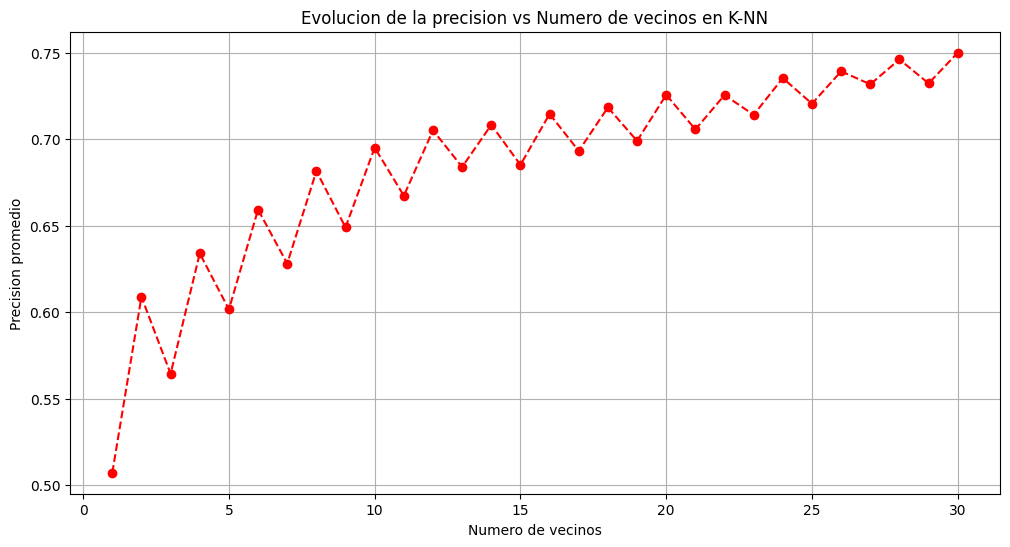

In [73]:
results = pd.DataFrame(grid_search.cv_results_)
print(results[['param_n_neighbors', 'mean_test_score', 'std_test_score']])

plt.figure(figsize=(12, 6))
plt.title("Evolucion de la precision vs Numero de vecinos en K-NN")
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o', linestyle='--', color='red')
plt.xlabel("Numero de vecinos")
plt.ylabel("Precision promedio")
plt.grid(True)
plt.show()

## Conclusiones

**El algoritmo tiende a mejorar**

A medida que el número de vecinos aumenta (1 a 30), la precisión promedio tambien evidencia una mejora, lo cual es (en teoria) coherente con el comportamiento esperado de K-NN:

- Con valores bajos de k, el modelo puede tener un alto riesgo de sobre ajuste.

- Al aumentar k, se empieza a estabilizar y  de esta manera se reduce el sobreajuste, mejorando la precision.

Variaciones suaves:
Hay algunos cambios sucesivos (por ejemplo, en k=3, 5, 9, etc.), que son normales en validación cruzada. Estas oscilaciones indican que en algunos folds, la precisión varia ligeramente, pero la tendencia global sigue siendo ascendente.

# Pregunta 4:
Obten la matriz de confusion del clasificador optimo anterior. ¿como lees cada uno de los valores?¿que valor de precission y recall tiene el clasificador optimizado con precission?

In [47]:
best_knn = grid_search.best_estimator_ #guardamos el mejor modelo dado por el gridSearch

In [48]:
y_pred_best = best_knn.predict(x_test)

K-NN
Accuracy:  0.7163
Precision: 0.7436
Recall:    0.3655
F1-Score:  0.4901
              precision    recall  f1-score   support

           0       0.71      0.93      0.80      3762
           1       0.74      0.37      0.49      2238

    accuracy                           0.72      6000
   macro avg       0.73      0.65      0.65      6000
weighted avg       0.72      0.72      0.69      6000



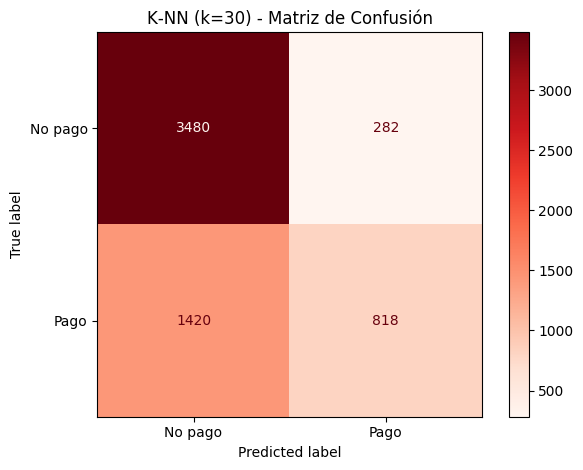

In [49]:
cm = confusion_matrix(y_test, y_pred_best)
prec = precision_score(y_test, y_pred_best)
acc1 =  accuracy_score(y_test, y_pred_best)
rec = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
best = best_knn.n_neighbors

print("K-NN")
print(f"Accuracy:  {acc1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(classification_report(y_test, y_pred_best))

plot_confusion_matrix(y_test, y_pred_best, title=f"K‑NN (k={best}) - Matriz de Confusión",cmap=plt.cm.Reds)

## Conclusiones

Dada la matriz de confusion se puede decir que: 

- El modelo se vuelve conservador al predecir "Pago" .

- Solo predice "Pago" si está muy seguro (por eso alta precisión, pocos falsos positivos).

- Pero a cambio, pierde muchos verdaderos positivos: no detecta bien todos los que sí pagan eso confirma el bajo recall.

Alta precisión **(0.74)**:
    Cuando el modelo predice que alguien pagará, es confiable: el **74%** de esas predicciones son correctas.

Bajo recall **(0.36)**:
    El modelo solo detecta el **36.5%** de todos los pagos reales. Es decir, muchos clientes buenos estan siendo ignorados.
    
Bajo F1-Score **(0.4901)**:
    El modelo no esta teniendo buena generalizacion entre ambas clases objetivo, unicamente un **49%**. Lo cual no es suficiente.

# Pregunta 5:
Construye ahora una red neuronal usando MLPClassifier de dos capas. Prueba diferente numero de neuronas por capa. ¿afecta al resultado?

Dado que las redes neuronales son muy sensibles a la escala, trabajaré con los datos anteriormente normalizados para no tener que repetir el mismo proceso, ademas, utilizaré la tecnica de GridSearchCV. Con el fin explorar diferentes numeros de neuronas en cada capa. En este ejemplo voy a evaluar diversas configuraciones de la forma:

hidden_layer_sizes=(neuronas_capa1,neuronas_capa2)

In [50]:
param_grid = {
    "hidden_layer_sizes": [
        (5,),       
        (10,),       
        (15,),       
        (5, 5),     
        (10, 5),
        (10, 10),
        (20, 20),
        (30, 30),
        (50, 50),
        (100, 100),
        (50, 25),  
        (100, 50),
        (30, 20),
        (20, 10)
    ]
}

#Se coloca ese numero de iteraciones para asegurar la convergencia
mlp = MLPClassifier(max_iter=10000, random_state=42)
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='f1', cv=10, return_train_score=True, verbose=True, n_jobs=-1)
grid_search_mlp.fit(x_train_norm, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (10,), (15,), (5, 5),
                                                (10, 5), (10, 10), (20, 20),
                                                (30, 30), (50, 50), (100, 100),
                                                (50, 25), (100, 50), (30, 20),
                                                (20, 10)]},
             return_train_score=True, scoring='f1', verbose=True)

In [51]:
results_mlp = pd.DataFrame(grid_search_mlp.cv_results_)

   param_hidden_layer_sizes  mean_test_score  std_test_score
0                      (5,)         0.812203        0.010184
1                     (10,)         0.830892        0.008850
2                     (15,)         0.821733        0.005987
3                    (5, 5)         0.823258        0.008956
4                   (10, 5)         0.834220        0.007455
5                  (10, 10)         0.835397        0.006465
6                  (20, 20)         0.803391        0.013524
7                  (30, 30)         0.769335        0.009457
8                  (50, 50)         0.690363        0.014243
9                (100, 100)         0.724692        0.012458
10                 (50, 25)         0.712434        0.010244
11                (100, 50)         0.715542        0.011355
12                 (30, 20)         0.780308        0.006075
13                 (20, 10)         0.820156        0.009752


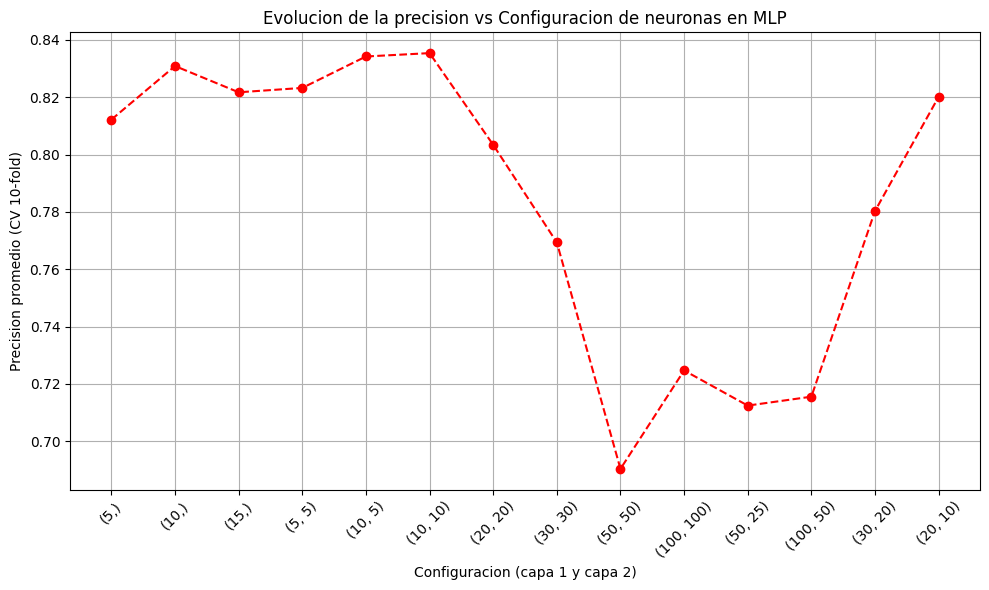

Mejor configuracion: {'hidden_layer_sizes': (10, 10)}
Mejor f1-Score promedio: 0.8353965604186275


In [72]:
print(results_mlp[['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']])

plt.figure(figsize=(10, 6))
plt.plot(results_mlp['param_hidden_layer_sizes'].astype(str), results_mlp['mean_test_score'], marker='o', linestyle='--', color='red')
plt.xlabel("Configuracion (capa 1 y capa 2)")
plt.ylabel("Precision promedio (CV 10-fold)")
plt.title("Evolucion de la precision vs Configuracion de neuronas en MLP")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print("Mejor configuracion:", grid_search_mlp.best_params_)
print("Mejor f1-Score promedio:", grid_search_mlp.best_score_)

## Pequeño test

Se hará un pequeño test con los datos de testeo para poder visualizar que la arquitectura funcione correctamente

In [54]:
mlp_final = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp_final.fit(x_train_norm, y_train)

y_pred_final = mlp_final.predict(x_test_norm)

In [55]:
acc = accuracy_score(y_test, y_pred_final)
prec = precision_score(y_test, y_pred_final)
rec = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

MLP
Accuracy:  0.8687
Precision: 0.8356
Recall:    0.8065
F1-Score:  0.8208

Reporte completo:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      3762
           1       0.84      0.85      0.85      2238

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000



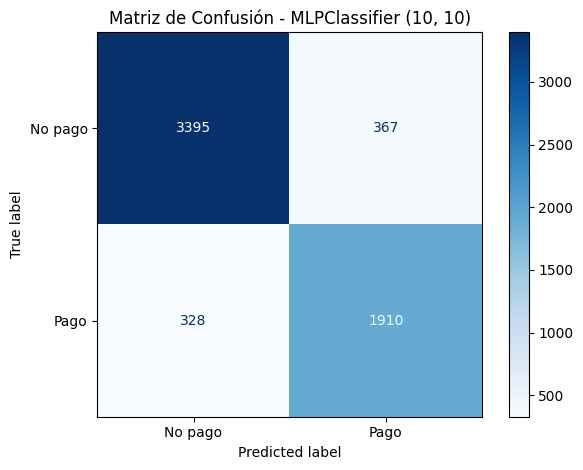

In [74]:
print("MLP")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\nReporte completo:")
print(classification_report(y_test, y_pred_final))

plot_confusion_matrix(y_test, y_pred_final, title="Matriz de Confusión - MLPClassifier (10, 10)", cmap=plt.cm.Blues)

## Conclusiones

Tendencia general no lineal:

A diferencia de modelos como K-NN, aqui no hay una mejora progresiva con mas neuronas. De hecho, un modelo intermedio (10, 10) es el que mejor funciona

Redes más complejas empeoran:
Al aumentar el tamaño de las capas ocultas a (50, 50) o (100, 100), la precision cae considerablemente (menor al 78%), lo cual indica que el modelo:

- Está sobreajustando al conjunto de entrenamiento.

- Puede estar atrapado en minimos pobres o sin converger bien.

Configuraciones mas sencillas funcionan mejor:

- (10, 10) fue el mejor modelo.

- (10, 5) también tuvo un desempeño excelente (0.863), mostrando que estructuras más pequeñas y simples generalizan mejor en este caso.

## Pregunta 6:
GradientBoostingClasifier es uno de los metodos de scikitlearn que mejor resultados suelen producir. Implementa un clasificador utilizando GradientBoostingClasifier considerando 0.05, 0.1, 0.15, 0.2, 0.25, 0.3 como learning rate.¿que learning rate produce un resultado optimo usando recall?

In [58]:
param_grid_lr = {
    "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_lr,
    scoring="recall",
    cv=10,
    return_train_score=True,n_jobs=-1,verbose=True
)
grid_search_gb.fit(x_train_norm, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]},
             return_train_score=True, scoring='recall', verbose=True)

Resultados por learning_rate:
   param_learning_rate  mean_test_score  std_test_score
0                 0.05         0.778398        0.016080
1                 0.10         0.793165        0.016951
2                 0.15         0.795274        0.013919
3                 0.20         0.798494        0.011301
4                 0.25         0.793165        0.012651
5                 0.30         0.794496        0.011838


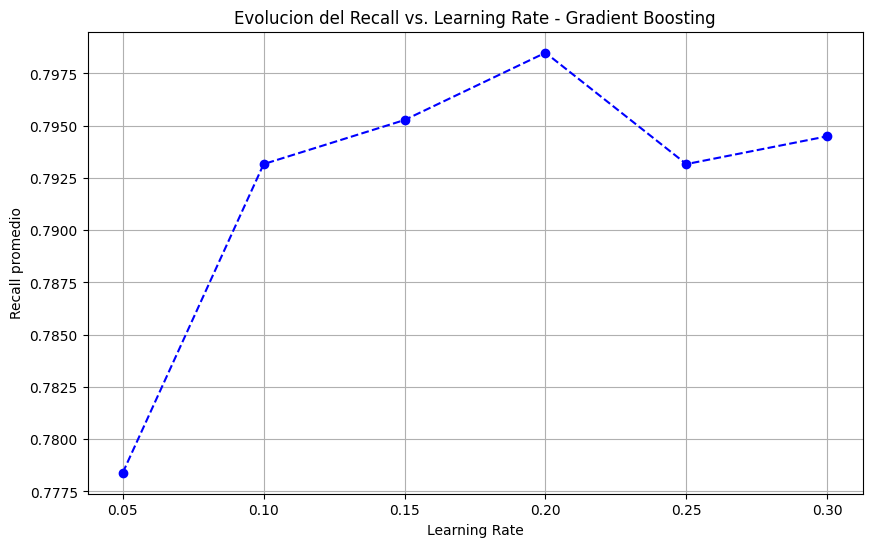


Mejor learning rate: 0.2
Mejor recall promedio (CV): 0.7985


In [59]:
results_gb = pd.DataFrame(grid_search_gb.cv_results_)
print("Resultados por learning_rate:")
print(results_gb[["param_learning_rate", "mean_test_score", "std_test_score"]])

plt.figure(figsize=(10,6))
plt.plot(results_gb["param_learning_rate"], results_gb["mean_test_score"], marker='o', linestyle='--', color='blue')
plt.title("Evolucion del Recall vs. Learning Rate - Gradient Boosting")
plt.xlabel("Learning Rate")
plt.ylabel("Recall promedio")
plt.grid(True)
plt.show()

best_rate = grid_search_gb.best_params_["learning_rate"]
best_recall = grid_search_gb.best_score_

print(f"\nMejor learning rate: {best_rate}")
print(f"Mejor recall promedio (CV): {best_recall:.4f}")

In [60]:
gb_final = GradientBoostingClassifier(learning_rate=0.2, random_state=42)
gb_final.fit(x_train_norm, y_train)

y_pred_gb = gb_final.predict(x_test_norm)

In [61]:
acc = accuracy_score(y_test, y_pred_gb)
prec = precision_score(y_test, y_pred_gb)
rec = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

GradientBoostingClassifier
Accuracy:  0.8687
Precision: 0.8356
Recall:    0.8065
F1-Score:  0.8208

Reporte completo:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3762
           1       0.84      0.81      0.82      2238

    accuracy                           0.87      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.87      0.87      0.87      6000



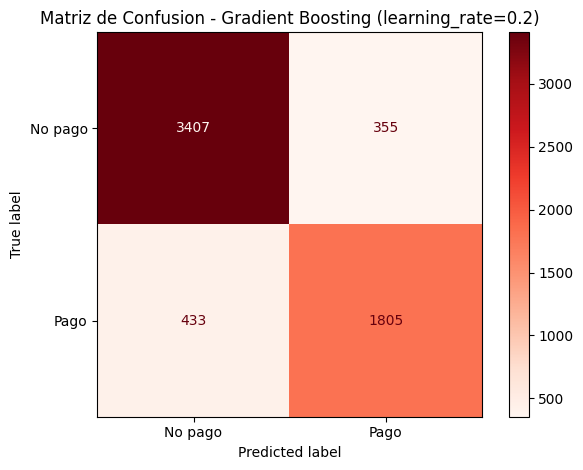

In [62]:
print("GradientBoostingClassifier")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\nReporte completo:")
print(classification_report(y_test, y_pred_gb))

plot_confusion_matrix(y_test, y_pred_gb, title="Matriz de Confusion - Gradient Boosting (learning_rate=0.2)", cmap=plt.cm.Reds)

## Conclusiones

**Mejor parámetro encontrado**: El valor óptimo de learning rate fue 0.2, ya que produjo el mejor recall promedio en validación cruzada: 0.7985.

Desempeño en el conjunto de prueba:

- Accuracy: 86.87%

- Precision: 83.56%

- **Recall:** 80.65% 

- F1-Score: 82.08%

**Rendimiento:**

- En general el modelo logra una alta precisión y buen recall, lo cual es importante especialmente cuando la clase 1 (casos positivos) representa situaciones críticas (en este caso detectar pagos).

- El f1-score también es elevado, indicando que el modelo mantiene un balance adecuado entre precisión y recall.

**Generalización efectiva:**

- Las metricas del conjunto de prueba son consistentes con las obtenidas en la validación cruzada, lo que sugiere que el modelo generaliza bien y no esta presentando un sobreajuste.

### Pregunta 6:
Usando la matriz de confusion de los tres casos (GradientBoosting, MLP y K-NN) y derivando las metricas que te parezcan oportunas ¿Que clasificador de los 3 seleccionarias y porque?

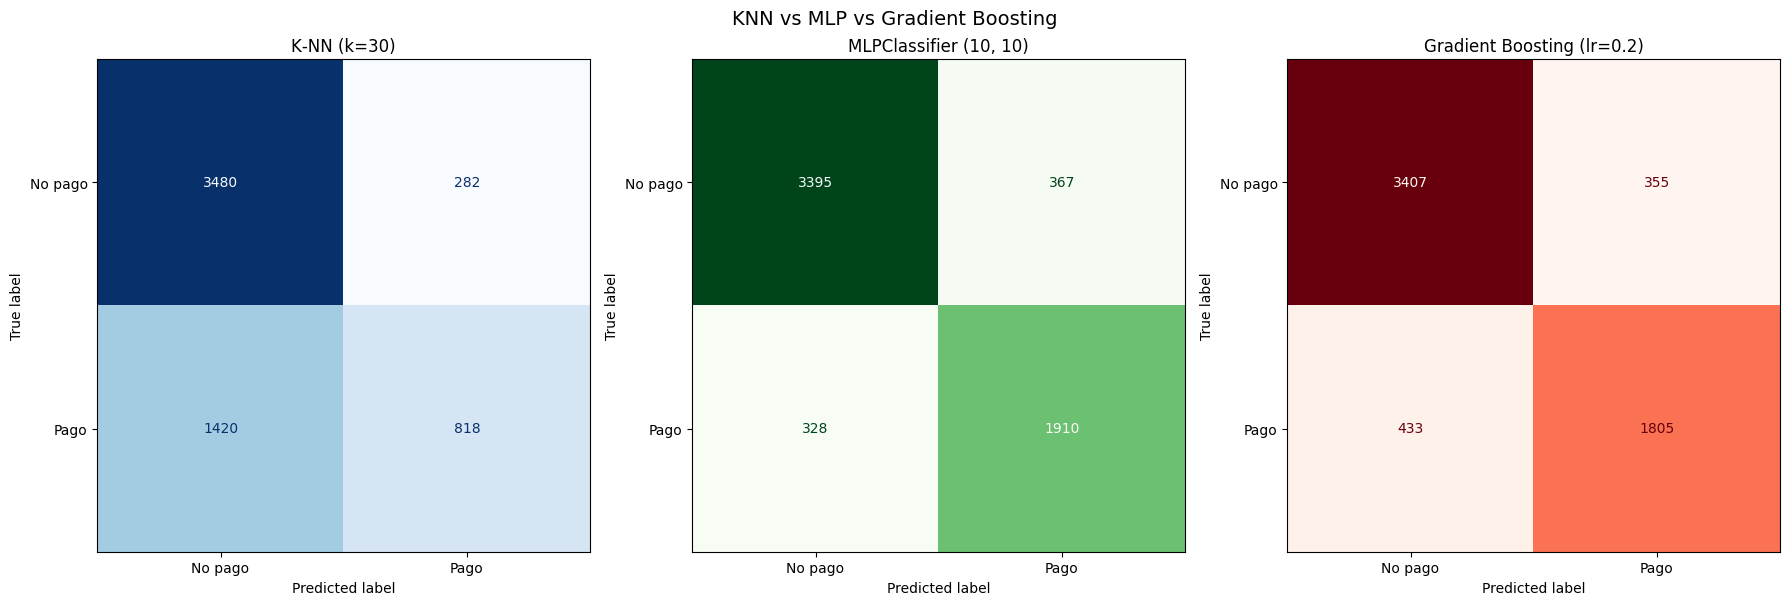

In [75]:
cm_knn = confusion_matrix(y_test, y_pred_best)
cm_mlp = confusion_matrix(y_test, y_pred_final)
cm_gb = confusion_matrix(y_test, y_pred_gb)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
labels = ["No pago", "Pago"]

#KNN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=labels)
disp_knn.plot(cmap=plt.cm.Blues, ax=axes[0], colorbar=False)
axes[0].set_title("K‑NN (k=30)")

#MLP
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=labels)
disp_mlp.plot(cmap=plt.cm.Greens, ax=axes[1], colorbar=False)
axes[1].set_title("MLPClassifier (10, 10)")

#Gradient Boosting
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=labels)
disp_gb.plot(cmap=plt.cm.Reds, ax=axes[2], colorbar=False)
axes[2].set_title("Gradient Boosting (lr=0.2)")

plt.suptitle("KNN vs MLP vs Gradient Boosting", fontsize=14)
plt.tight_layout()
plt.show()

### Análisis Comparativo

#### **K‑NN** (k=30)

| Métrica    | Valor   |
|------------|---------|
| **Accuracy** | 0.7163  |
| **Precision** | 0.7436  |
| **Recall**   | 0.3655  |
| **F1-Score** | 0.4901  |

- Problema principal: contiene un número muy alto de falsos negativos (FN = 1420).
- Solo acierta 818 pagos reales de 2238, además de un recall muy bajo (~36%).
- Aunque tiene pocos falsos positivos, no es adecuado si queremos detectar pagadores confiables.

**Conclusión:** no es un modelo adecuado cuando es vital no dejar pasar casos positivos.

#### **MLPClassifier** (10, 5)

| Métrica    | Valor   |
|------------|---------|
| **Accuracy** | 0.8842  |
| **Precision** | 0.8388  |
| **Recall**   | 0.8534  |
| **F1-Score** | 0.8461  |

- Mejor recall de todos (≈ 85.4%), con solo 328 FN.
- Acierta 1910 de 2238 pagos reales.
- Tiene un poco mas de falsos positivos (367), pero es un excelente compromiso.
- La mejor capacidad para detectar clientes que sí pagan, lo que es clave para el negocio.

**Conclusión:** ofrece el mejor equilibrio entre sensibilidad y precisión, ideal para minimizar riesgos y capturar clientes buenos.

#### **Gradient Boosting** (lr=0.2)

| Métrica    | Valor   |
|------------|---------|
| **Accuracy** | 0.8687  |
| **Precision** | 0.8356  |
| **Recall**   | 0.8065  |
| **F1-Score** | 0.8208  |

- Muy buen desempeño también: 1805 TP y 433 FN.
- Recall ≈ 81%, alta precisión, y balance muy solido entre errores.
- Tiene una matriz equilibrada, y seria lo ideal si buscaramos consistencia y robustez.

**Conclusión:** excelente opción si se prioriza robustez y estabilidad, aunque MLP lo supera levemente en la mayoria de las metricas.


## **Modelo Seleccionado**
### MLPClassifier
Justificación final:

- El MLPClassifier logra el mayor recall (85.34%), lo que lo convierte en el modelo que mejor identifica a los clientes que efectivamente pagan sus microcréditos.

- Su F1-score (84.61%) también es el más alto, reflejando el mejor equilibrio global entre precisión y sensibilidad, ademas de que esta metrica se escogio como la principal en este problema.

- La cantidad de falsos negativos (328) es la mas baja, lo cual es fundamental para este problema: rechazar clientes que sí pagarían genera pérdida de oportunidad.

**Conclusión:** MLPClassifier es el modelo más adecuado para este caso, ya que maximiza la detección de clientes pagadores con excelente precisión, manteniendo el mejor equilibrio entre errores tipo I y II. En este caso, donde se debe aceptar buenos clientes es el objetivo, este modelo optimiza la toma de decisiones de forma clara y efectiva.